<a href="https://colab.research.google.com/github/MohammadAburub93/Python-Data-Science-Practice/blob/main/Programming_Languages_Trends/Programming_Languages_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Statements

In [26]:
import pandas as pd
!pip install matplotlib
import matplotlib.pyplot as plt

## Data Exploration

In [27]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [28]:
print(df.head())
print(df.tail())

                  DATE       TAG  POSTS
0  2008-07-01 00:00:00        c#      3
1  2008-08-01 00:00:00  assembly      8
2  2008-08-01 00:00:00         c     82
3  2008-08-01 00:00:00        c#    503
4  2008-08-01 00:00:00       c++    164
                     DATE     TAG  POSTS
2910  2026-01-01 00:00:00     php     53
2911  2026-01-01 00:00:00  python    409
2912  2026-01-01 00:00:00       r     79
2913  2026-01-01 00:00:00    ruby      7
2914  2026-01-01 00:00:00   swift     69


In [29]:
df.shape

(2915, 3)

In [30]:
df.count()

,0
DATE,2915
TAG,2915
POSTS,2915


Calculate the total number of post per language,
And which Programming language has had the highest total number of posts of all time?

In [31]:
print(df.groupby('TAG')['POSTS'].sum())
print(df.groupby('TAG')['POSTS'].sum().loc[df.groupby('TAG').sum().idxmax()])

TAG
assembly        45181
c              408229
c#            1623150
c++            814718
delphi          52553
go              74474
java          1916919
javascript    2525274
perl            68311
php           1463796
python        2207779
r              510653
ruby           229240
swift          336220
Name: POSTS, dtype: int64
TAG
go              74474
javascript    2525274
Name: POSTS, dtype: int64


Number of months of data exist per language.

In [32]:
df.groupby('TAG')['DATE'].count()

,DATE
TAG,
assembly,210
c,210
c#,211
c++,210
delphi,210
go,195
java,210
javascript,210
perl,210


## Data Cleaning

Fix the date format to make it more readable. Convert the date fromat from string to datetime object

In [33]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [34]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



In [35]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [36]:
reshaped_df.shape

(211, 14)

In [37]:
print(reshaped_df.head())
print(reshaped_df.tail())

TAG         assembly      c      c#    c++  delphi  go    java  javascript  \
DATE                                                                         
2008-07-01       NaN    NaN     3.0    NaN     NaN NaN     NaN         NaN   
2008-08-01       8.0   82.0   503.0  164.0    13.0 NaN   220.0       160.0   
2008-09-01      28.0  320.0  1637.0  749.0   104.0 NaN  1121.0       629.0   
2008-10-01      16.0  302.0  1982.0  804.0   112.0 NaN  1142.0       720.0   
2008-11-01      16.0  257.0  1728.0  733.0   139.0 NaN   951.0       581.0   

TAG          perl    php  python    r   ruby  swift  
DATE                                                 
2008-07-01    NaN    NaN     NaN  NaN    NaN    NaN  
2008-08-01   28.0  157.0   119.0  NaN   68.0    NaN  
2008-09-01  128.0  472.0   533.0  6.0  285.0    NaN  
2008-10-01  128.0  603.0   504.0  NaN  245.0    NaN  
2008-11-01   97.0  497.0   446.0  1.0  154.0    NaN  
TAG         assembly      c     c#    c++  delphi    go   java  javascript 

In [38]:
print(reshaped_df.columns)

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')


In [39]:
reshaped_df.count()

,0
TAG,
assembly,210
c,210
c#,211
c++,210
delphi,210
go,195
java,210
javascript,210
perl,210


In [40]:
reshaped_df.fillna(0, inplace=True)

In [41]:
reshaped_df.isna().values.any()

np.False_

## Data Visualisaton with with Matplotlib


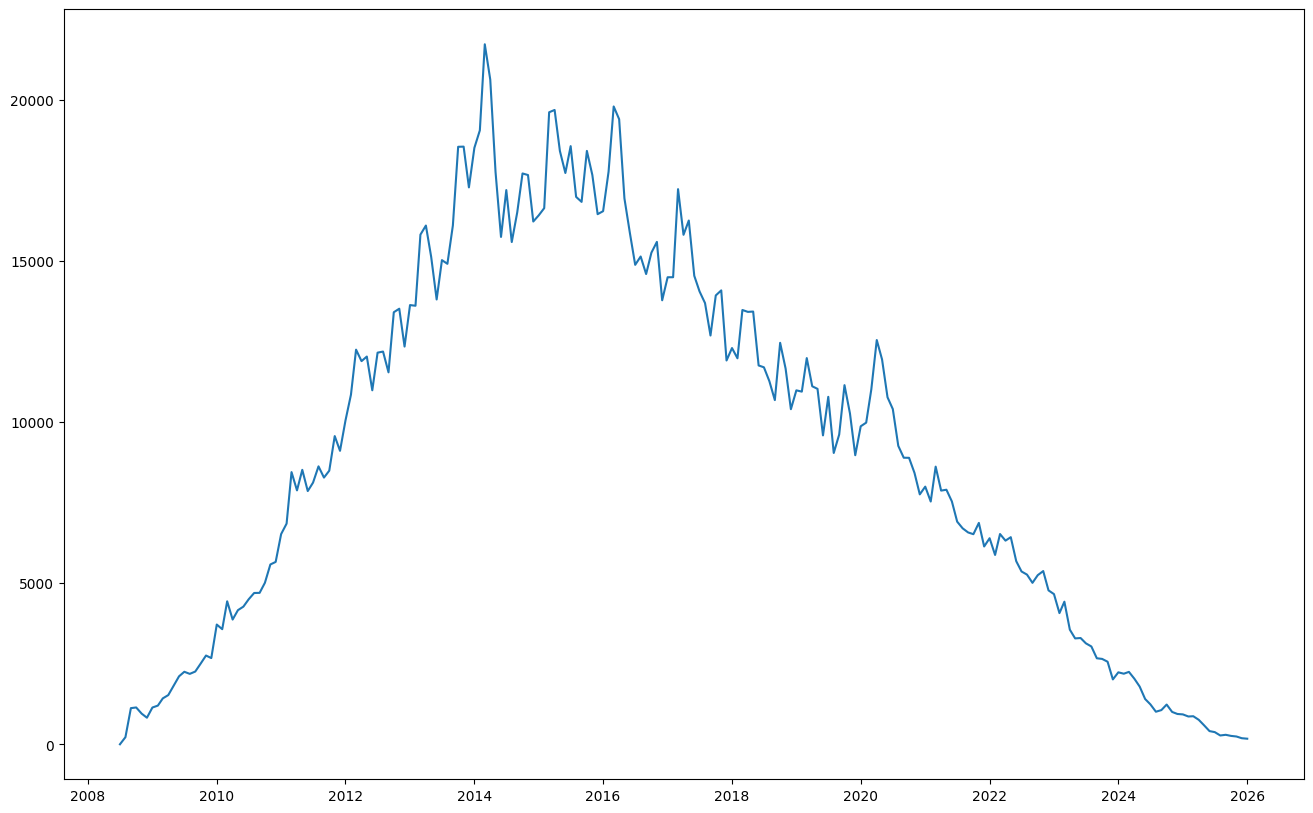

In [42]:
plt.figure(figsize=(16,10))
plt.plot(reshaped_df.index,reshaped_df['java'])

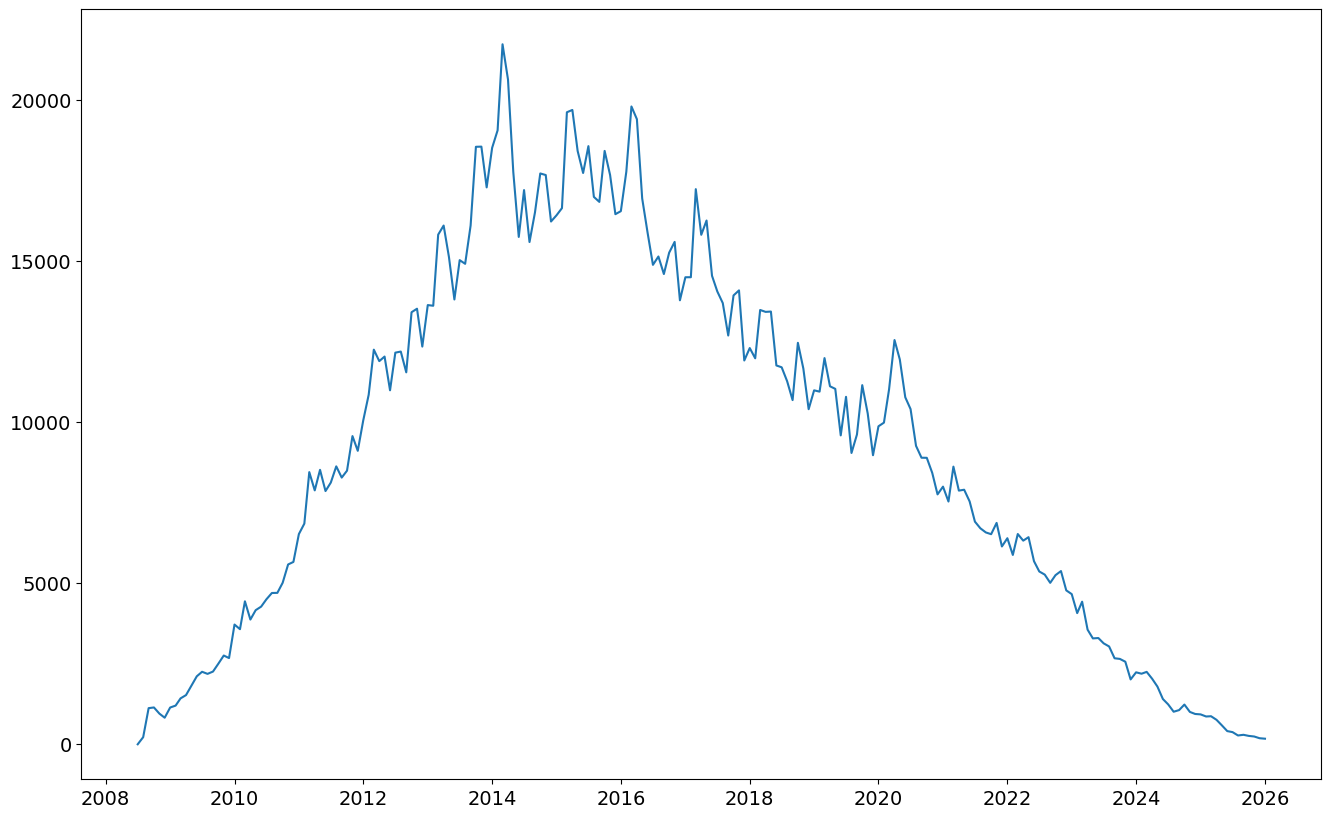

In [43]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index,reshaped_df['java'])

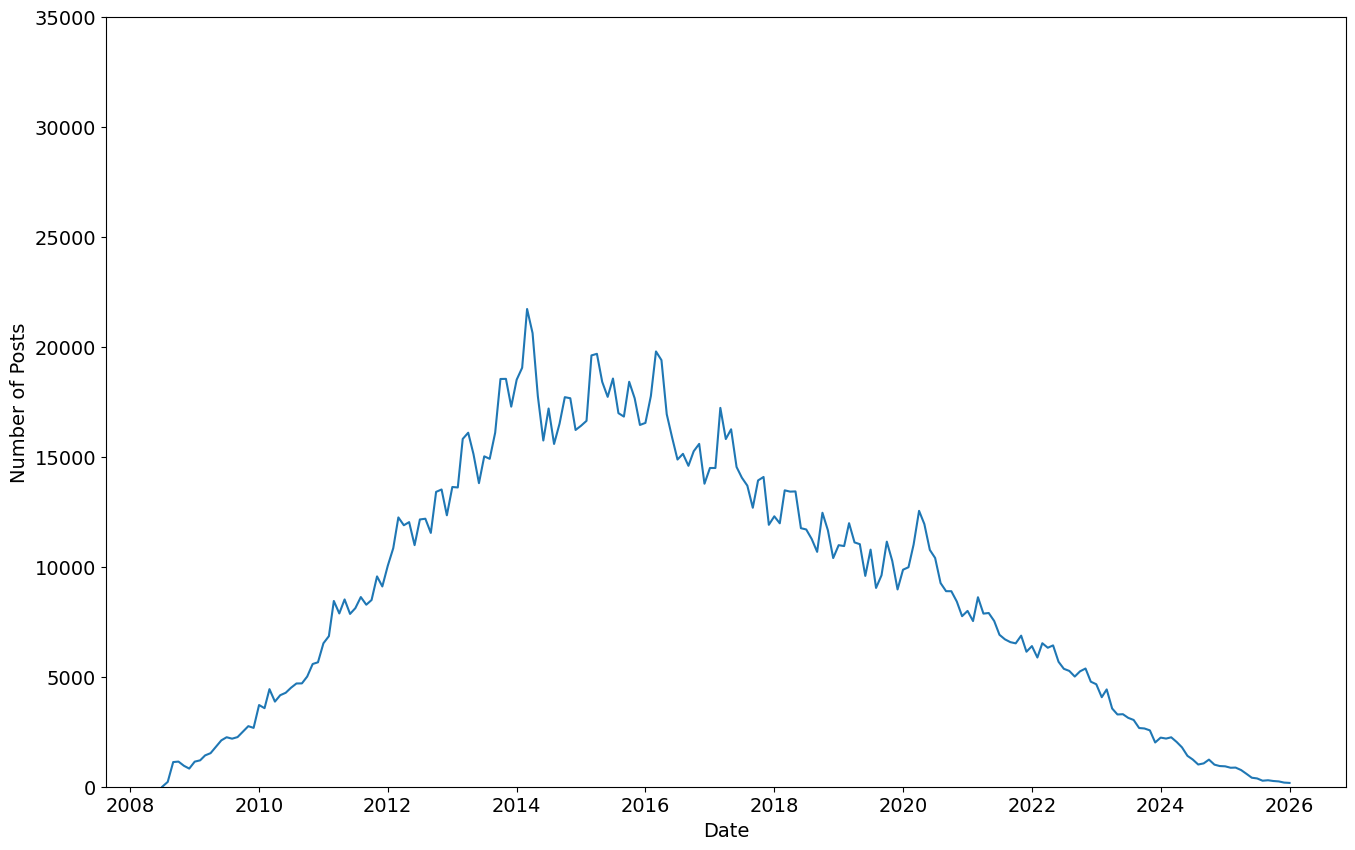

In [44]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index,reshaped_df['java'])

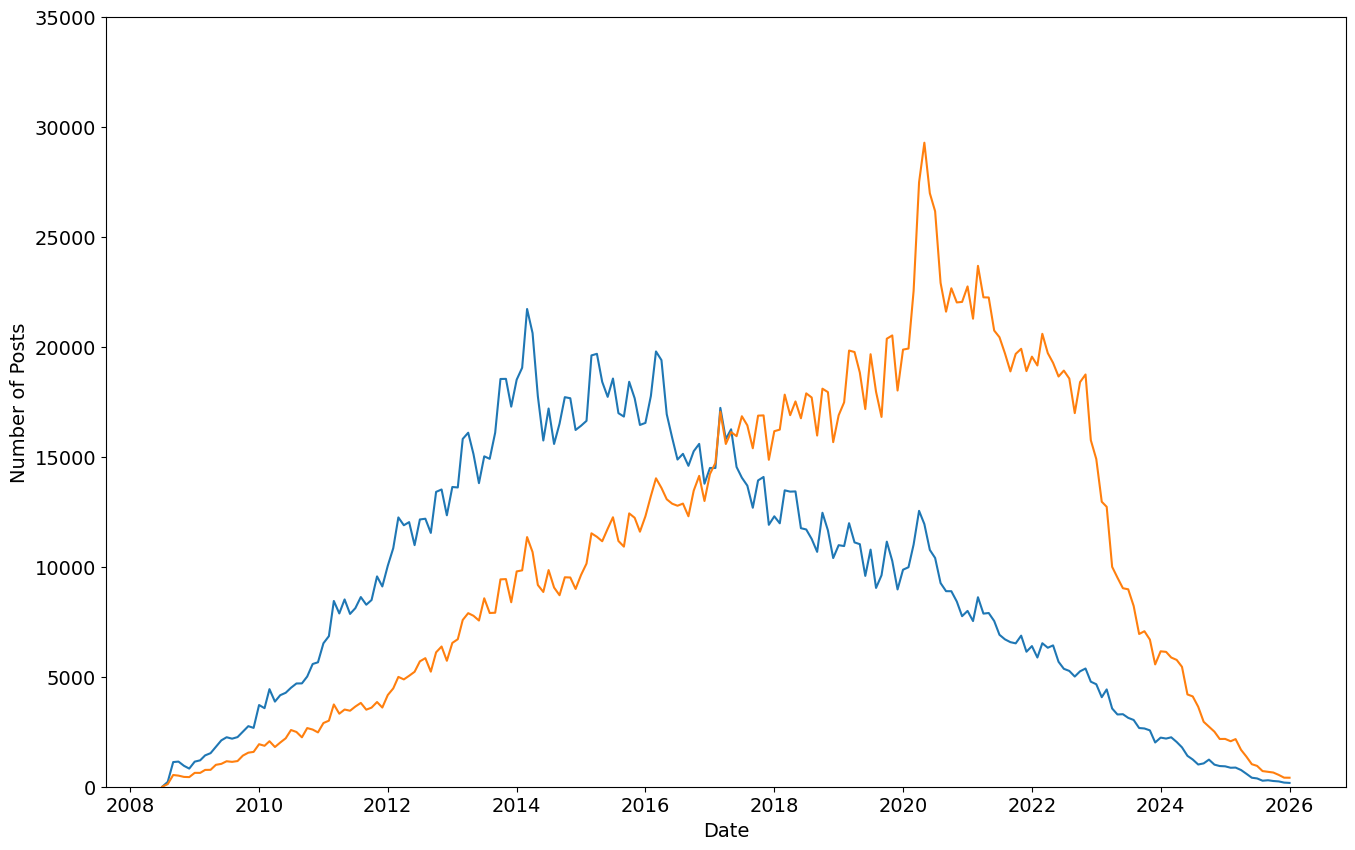

In [45]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index,reshaped_df["java"])
plt.plot(reshaped_df.index,reshaped_df["python"])


### OBSERVATION: **Python** started overtaking **java** around 2017, **Likely** due to rise of data science libraries.

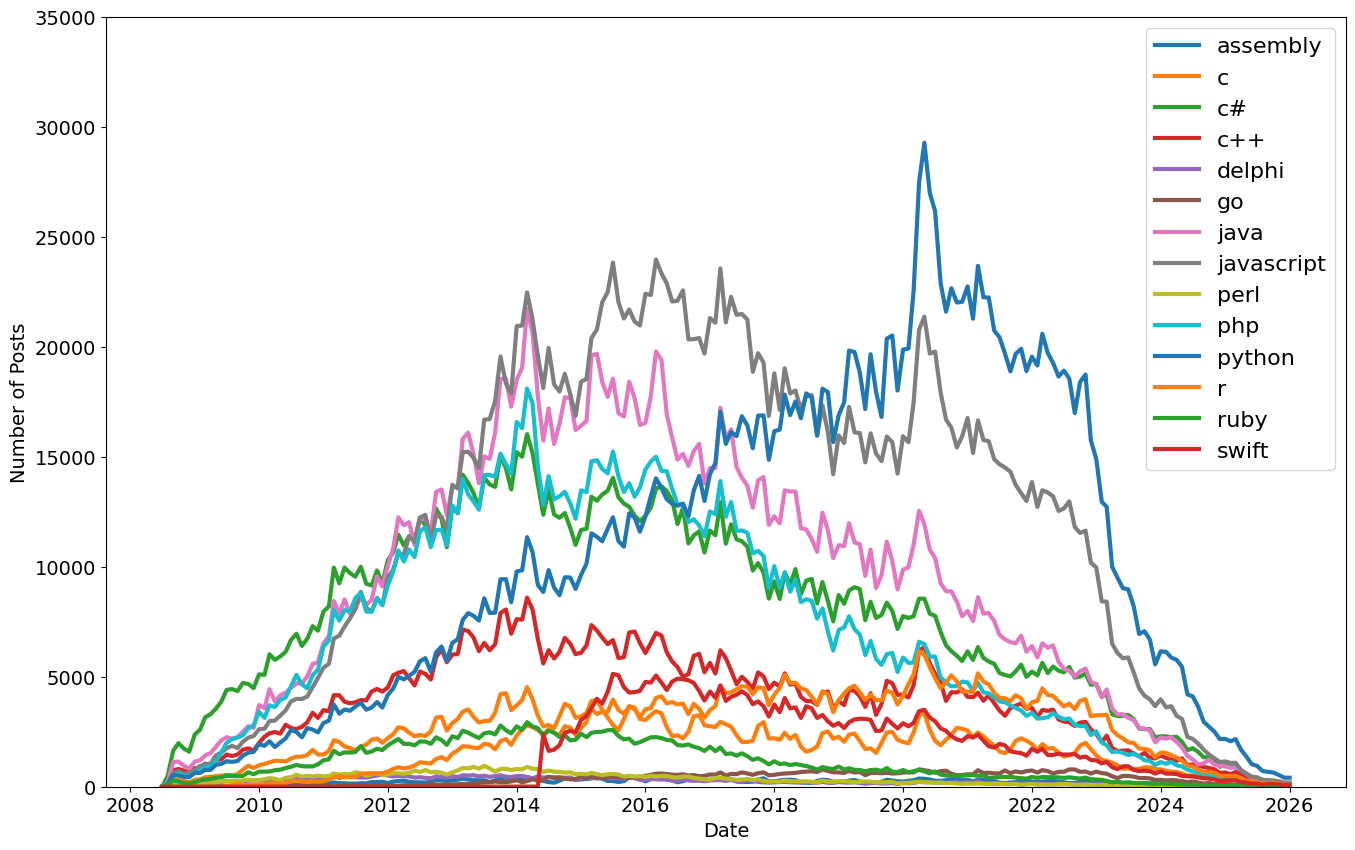

In [46]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for col in reshaped_df.columns:
  plt.plot(reshaped_df.index,reshaped_df[col], linewidth=3, label=col)
plt.legend(fontsize=16)

# Smoothing out Time Series Data



In [47]:
roll_df = reshaped_df.rolling(window=6).mean()

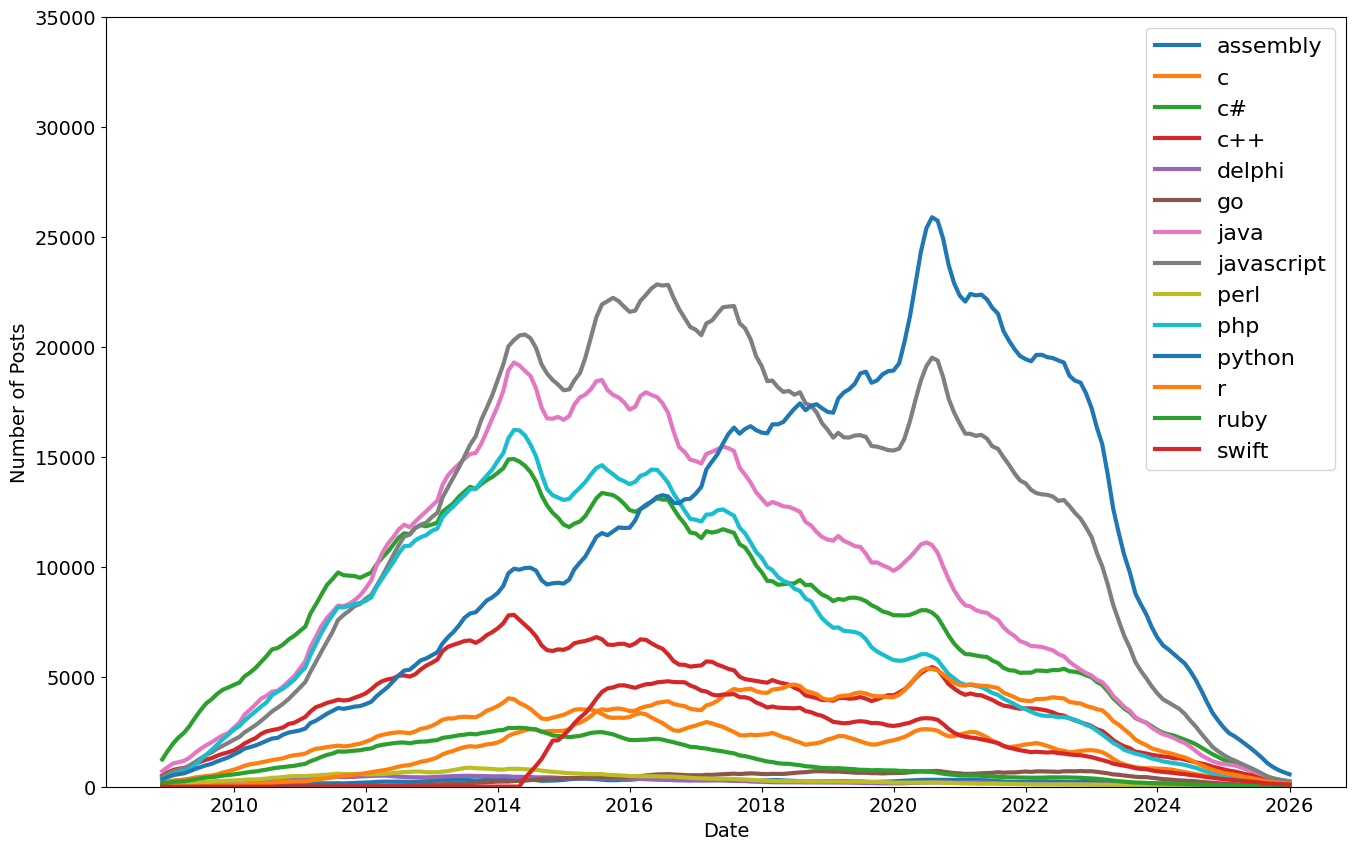

In [48]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for col in roll_df.columns:
  plt.plot(roll_df.index,roll_df[col], linewidth=3, label=col)
plt.legend(fontsize=16)

In [49]:
roll_df = reshaped_df.rolling(window=12).mean()

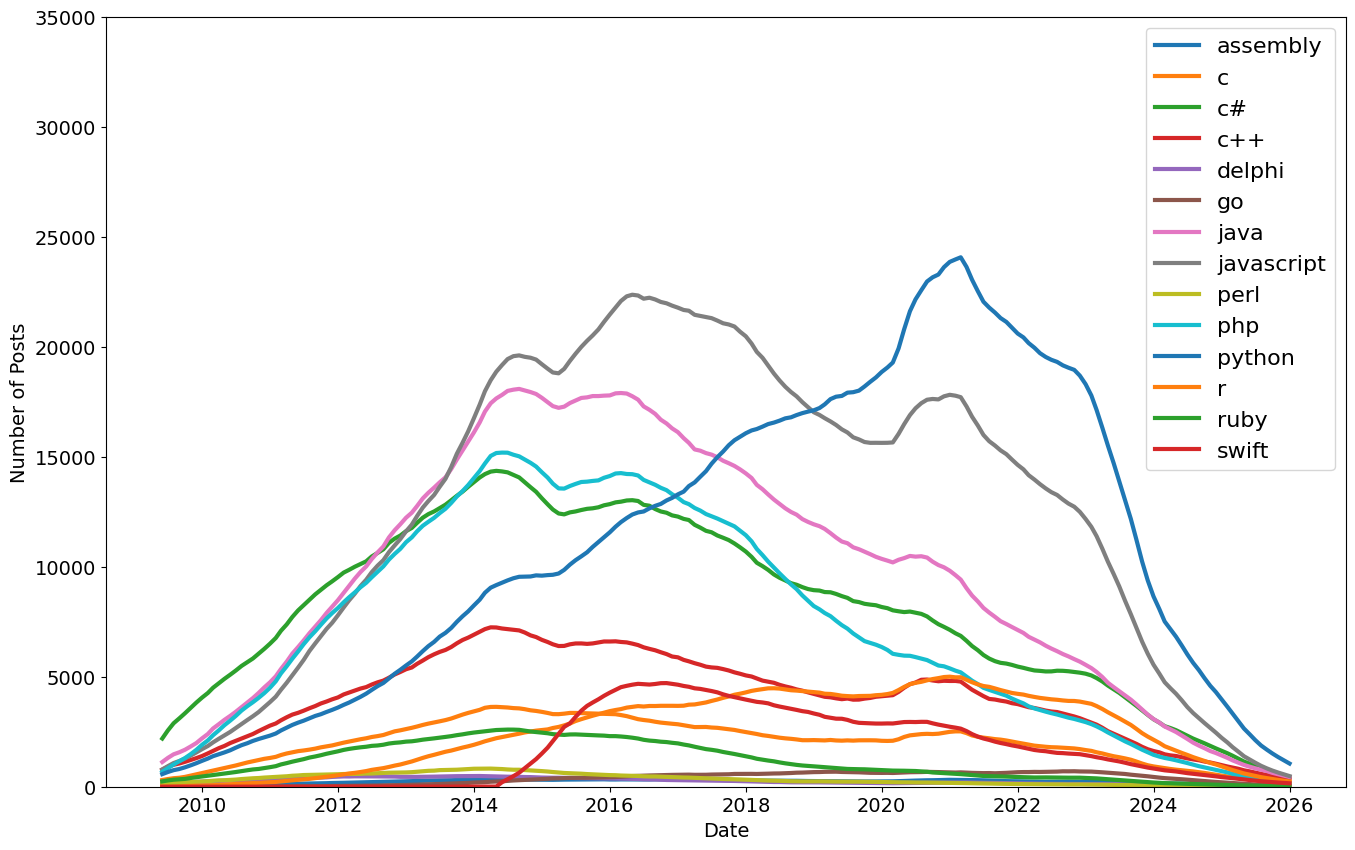

In [50]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
for col in roll_df.columns:
  plt.plot(roll_df.index,roll_df[col], linewidth=3, label=col)
plt.legend(fontsize=16)

###OBSERVATION: For the past three years number of posts on Stack Overflow website for all programming languages have been declining, **likely** due to increased reliance on AI tools as an assistant
